In [1]:
from requests import Request, Session
from requests.exceptions 
import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '666d8774-0ee6-49e2-b5b1-ecdd47ef55d1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-01-27T17:32:13.136Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 8800}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961031e+07,1.961031e+07,False,NaN,1,NaN,NaN,None,2024-01-27T17:36:00.000Z,41829.401553,1.460225e+10,-40.5428,-0.051031,-0.051698,0.582882,-1.813990,9.576127,21.084691,8.202876e+11,50.8280,8.784174e+11,None,2024-01-27T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,None,2024-01-27T17:36:00.000Z,2265.573955,5.999658e+09,-42.1919,-0.262688,-0.194037,-7.928453,-4.426784,9.380249,26.053446,2.722774e+11,16.8713,2.722774e+11,None,2024-01-27T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
2,825,Tether USDt,USDT,tether,73206,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-27T17:35:00.000Z,1.000056,2.818147e+10,-28.6887,0.012506,0.013841,-0.040549,-0.029494,-0.028214,-0.013687,9.604209e+10,5.9511,9.860625e+10,None,2024-01-27T17:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-27 19:04:39.252338
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495476e+08,1.495476e+08,False,NaN,4,NaN,NaN,None,2024-01-27T17:35:00.000Z,303.505627,7.018069e+08,-29.0304,-0.017909,0.550088,-3.625873,-9.122522,31.134728,33.763853,4.538855e+10,2.8124,4.538855e+10,None,2024-01-27T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.332595e+08,5.680552e+08,True,NaN,5,NaN,NaN,None,2024-01-27T17:36:00.000Z,92.674623,1.380229e+09,-28.9875,-0.461994,-0.128051,1.334133,-7.604951,59.866202,180.696080,4.015216e+10,2.4880,5.264430e+10,None,2024-01-27T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,None,2024-01-27T17:36:00.000Z,0.529348,6.707109e+08,-25.7116,-0.281121,0.915563,-3.414086,-16.345028,-13.750012,-5.177663,2.878302e+10,1.7835,5.293477e+10,None,2024-01-27T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
6,3408,USDC,USDC,usd-coin,16415,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.610100e+10,2.610100e+10,False,NaN,7,NaN,NaN,None,2024-01-27T17:36:00.000Z,1.000218,3.574493e+09,-32.3776,0.008726,-0.013760,-0.085904,-0.040448,0.019633,0.003585,2.610668e+10,1.6171,2.610668e+10,None,2024-01-27T17:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-27 19:04:39.252338
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541401e+10,3.657136e+10,False,NaN,8,NaN,NaN,None,2024-01-27T17:35:00.000Z,0.484826,2.840568e+08,-14.4698,-0.170438,-0.548927,-4.791561,-23.529183,25.371805,62.994208,1.716963e+10,1.0639,2.181717e+10,None,2024-01-27T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 19:04:39.252338
8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-cap

In [33]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '666d8774-0ee6-49e2-b5b1-ecdd47ef55d1',
    }
    session = Session()
    session.headers.update(headers)
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)
    
# Use this if you just want to keep it in a dataframe

    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)
  

  #Use this if you want to create a csv and append data to it

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r"C:\Users\LENOVO\Downloads\API.csv"):
        df.to_csv(r"C:\Users\LENOVO\Downloads\API.csv",header='column_names')
    else:
        df.to_csv(r"C:\Users\LENOVO\Downloads\API.csv",mode='a',header=False)

In [34]:
import os 
from time import time , sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [36]:
df71 = pd.read_csv(r"C:\Users\LENOVO\Downloads\API.csv")
df71

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.961118e+07,1.961118e+07,False,NaN,1,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,42379.602496,1.482323e+10,-21.7466,-0.070035,1.497866,1.324947,-1.108775,11.015955,21.729883,8.311141e+11,50.9006,8.899717e+11,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
1,1,1027,Ethereum,ETH,ethereum,8337,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201812e+08,1.201812e+08,True,NaN,2,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,2279.396048,6.325967e+09,-12.1312,0.101044,0.486443,-8.046116,-3.647844,10.765459,24.829062,2.739407e+11,16.7772,2.739407e+11,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
2,2,825,Tether USDt,USDT,tether,73219,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,0.999952,2.749235e+10,-18.1725,0.000766,0.008405,0.057540,-0.091352,-0.039031,-0.046387,9.603214e+10,5.8814,9.859604e+10,NaN,2024-01-28T14:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 15:10:00.500756
3,3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495475e+08,1.495475e+08,False,NaN,4,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,307.139950,7.524315e+08,-2.1846,-0.098887,1.302061,-3.755785,-3.186127,34.309204,34.052789,4.593202e+10,2.8131,4.593202e+10,NaN,2024-01-28T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
4,4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.333804e+08,5.682244e+08,True,NaN,5,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,97.633881,1.981729e+09,24.4856,-0.661145,5.935473,4.434264,-10.092804,59.518344,179.646934,4.231261e+10,2.5914,5.547795e+10,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
5,5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,0.530200,4.534424e+08,-40.6347,0.071662,0.139382,-4.077146,-16.360978,-13.444497,-7.906244,2.882938e+10,1.7656,5.302003e+10,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
6,6,3408,USDC,USDC,usd-coin,16422,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.614066e+10,2.614066e+10,False,NaN,7,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,1.000022,3.685569e+09,-13.1302,-0.013947,-0.014765,-0.003617,-0.028610,0.037718,-0.015064,2.614123e+10,1.6010,2.614123e+10,NaN,2024-01-28T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 15:10:00.500756
7,7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.541612e+10,3.657136e+10,False,NaN,8,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,0.493185,3.083183e+08,-2.4494,-0.373631,2.278518,-4.738521,-20.778882,28.193395,63.763743,1.746668e+10,1.0697,2.219330e+10,NaN,2024-01-28T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
8,8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'thr

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961128e+07,1.961128e+07,False,NaN,1,NaN,NaN,None,2024-01-28T14:12:00.000Z,42386.040336,1.483633e+10,-21.5537,-0.017077,1.546007,1.330989,-1.104246,11.004907,21.762870,8.312443e+11,50.9404,8.901068e+11,None,2024-01-28T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
1,1027,Ethereum,ETH,ethereum,8337,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201812e+08,1.201812e+08,True,NaN,2,NaN,NaN,None,2024-01-28T14:12:00.000Z,2279.801470,6.334077e+09,-11.9602,0.173553,0.531462,-8.020473,-3.712486,10.744367,24.908302,2.739894e+11,16.7907,2.739894e+11,None,2024-01-28T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
2,825,Tether USDt,USDT,tether,73219,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-28T14:11:00.000Z,0.999908,2.750384e+10,-18.0520,-0.015883,-0.001116,0.053355,-0.078319,-0.037096,-0.056192,9.602793e+10,5.8811,9.859171e+10,None,2024-01-28T14:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 15:13:08.190348
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495475e+08,1.495475e+08,False,NaN,4,NaN,NaN,None,2024-01-28T14:11:00.000Z,307.232299,7.527109e+08,-2.0855,-0.044638,1.291665,-3.697407,-3.146923,34.324633,34.065725,4.594583e+10,2.8139,4.594583e+10,None,2024-01-28T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.333802e+08,5.682242e+08,True,NaN,5,NaN,NaN,None,2024-01-28T14:12:00.000Z,97.770892,1.987455e+09,24.8528,-0.597256,6.089715,4.553753,-10.536698,59.463215,179.904562,4.237197e+10,2.5966,5.555579e+10,None,2024-01-28T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,None,2024-01-28T14:12:00.000Z,0.530328,4.535970e+08,-40.5950,0.082909,0.156837,-4.075887,-16.355057,-13.425100,-8.005125,2.883634e+10,1.7672,5.303283e+10,None,2024-01-28T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
6,3408,USDC,USDC,usd-coin,16422,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.614530e+10,2.614530e+10,False,NaN,7,NaN,NaN,None,2024-01-28T14:12:00.000Z,1.000063,3.692829e+09,-12.8964,-0.008486,-0.016083,0.002530,-0.012385,0.030066,-0.003556,2.614695e+10,1.6023,2.614695e+10,None,2024-01-28T14:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 15:13:08.190348
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541643e+10,3.657136e+10,False,NaN,8,NaN,NaN,None,2024-01-28T14:11:00.000Z,0.492979,3.088788e+08,-2.2244,-0.413289,2.190962,-4.823731,-20.895078,28.081135,63.580407,1.745957e+10,1.0693,2.218407e+10,None,2024-01-28T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:13:08.190348
8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [39]:
df71

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19611181.00000,19611181.00000,False,NaN,1,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,42379.60250,14823233192.92706,-21.74660,-0.07003,1.49787,1.32495,-1.10877,11.01595,21.72988,831114055249.38269,50.90060,889971652407.72998,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
1,1,1027,Ethereum,ETH,ethereum,8337,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120181248.37121,120181248.37121,True,NaN,2,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,2279.39605,6325967414.24240,-12.13120,0.10104,0.48644,-8.04612,-3.64784,10.76546,24.82906,273940662534.17050,16.77720,273940662534.17001,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
2,2,825,Tether USDt,USDT,tether,73219,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96036749591.53661,98600769239.51694,True,NaN,3,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,0.99995,27492348590.63883,-18.17250,0.00077,0.00841,0.05754,-0.09135,-0.03903,-0.04639,96032140011.45789,5.88140,98596036591.39999,NaN,2024-01-28T14:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 15:10:00.500756
3,3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149547542.29675,149547542.29675,False,NaN,4,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,307.13995,752431520.40386,-2.18460,-0.09889,1.30206,-3.75578,-3.18613,34.30920,34.05279,45932024688.43378,2.81310,45932024688.43000,NaN,2024-01-28T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
4,4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,433380411.74765,568224403.79352,True,NaN,5,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,97.63388,1981728947.73008,24.48560,-0.66114,5.93547,4.43426,-10.09280,59.51834,179.64693,42312611741.10838,2.59140,55477954074.07000,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
5,5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54374512255.00000,99987956150.00000,False,NaN,6,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,0.53020,453442362.32332,-40.63470,0.07166,0.13938,-4.07715,-16.36098,-13.44450,-7.90624,28829384707.85999,1.76560,53020033674.34000,NaN,2024-01-28T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 15:10:00.500756
6,6,3408,USDC,USDC,usd-coin,16422,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26140663560.50349,26140663560.50349,False,NaN,7,NaN,NaN,NaN,2024-01-28T14:09:00.000Z,1.00002,3685568988.80793,-13.13020,-0.01395,-0.01476,-0.00362,-0.02861,0.03772,-0.01506,26141228225.32717,1.60100,26141228225.33000,NaN,2024-01-28T14:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 15:10:00.500756
7,7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35416117445.32400,36571363488.23100,False,NaN,8,NaN,NaN,NaN,2024-01-28T14:08:00.000Z,0.49318,308318253.53648,-2.44940,-0.37363,2.27852,-4.73852,-20.77888,28.19340,63.76374,17466682079.23191,1.06970,22193304920.53000,NaN,2024-01-28

In [42]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01708,1.54601,1.33099,-1.10425,11.00491,21.76287
Ethereum,0.17355,0.53146,-8.02047,-3.71249,10.74437,24.90830
Tether USDt,-0.01588,-0.00112,0.05335,-0.07832,-0.03710,-0.05619
BNB,-0.04464,1.29166,-3.69741,-3.14692,34.32463,34.06573
Solana,-0.59726,6.08972,4.55375,-10.53670,59.46322,179.90456
XRP,0.08291,0.15684,-4.07589,-16.35506,-13.42510,-8.00512
USDC,-0.00849,-0.01608,0.00253,-0.01238,0.03007,-0.00356
Cardano,-0.41329,2.19096,-4.82373,-20.89508,28.08114,63.58041
Avalanche,-0.06352,10.75469,7.40484,-12.95768,69.12001,207.15010


In [44]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01708
             quote.USD.percent_change_24h     1.54601
             quote.USD.percent_change_7d      1.33099
             quote.USD.percent_change_30d    -1.10425
             quote.USD.percent_change_60d    11.00491
             quote.USD.percent_change_90d    21.76287
Ethereum     quote.USD.percent_change_1h      0.17355
             quote.USD.percent_change_24h     0.53146
             quote.USD.percent_change_7d     -8.02047
             quote.USD.percent_change_30d    -3.71249
             quote.USD.percent_change_60d    10.74437
             quote.USD.percent_change_90d    24.90830
Tether USDt  quote.USD.percent_change_1h     -0.01588
             quote.USD.percent_change_24h    -0.00112
             quote.USD.percent_change_7d      0.05335
             quote.USD.percent_change_30d    -0.07832
             quote.USD.percent_change_60d    -0.03710
             quote.USD.percent_change_90

In [45]:
type(df4)

pandas.core.series.Series

In [46]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.01708
            quote.USD.percent_change_24h   1.54601
            quote.USD.percent_change_7d    1.33099
            quote.USD.percent_change_30d  -1.10425
            quote.USD.percent_change_60d  11.00491
            quote.USD.percent_change_90d  21.76287
Ethereum    quote.USD.percent_change_1h    0.17355
            quote.USD.percent_change_24h   0.53146
            quote.USD.percent_change_7d   -8.02047
            quote.USD.percent_change_30d  -3.71249
            quote.USD.percent_change_60d  10.74437
            quote.USD.percent_change_90d  24.90830
Tether USDt quote.USD.percent_change_1h   -0.01588
            quote.USD.percent_change_24h  -0.00112
            quote.USD.percent_change_7d    0.05335
            quote.USD.percent_change_30d  -0.07832
            quote.USD.percent_change_60d  -0.03710
            quote.USD.percent_change_90d  -0.05619
BNB         quote.USD.percent_change_1h   -0.04464
            quote.USD.percent_change_24h   1.29166
            quote.USD.percent_change_7d   -3.69741
            quote.USD.percent_change_30d  -3.14692
            quote.USD.percent_change_60d  34.32463
            quote.USD.percent_change_90d  34.06573
Solana      quote.USD.percent_change_1h   -0.59726
            quote.USD.percent_change_24h   6.08972
            quote.USD.percent_change_7d    4.55375
            quote.USD.percent_change_30d -10.53670
            quote.USD.percent_change_60d  59.46322
            quote.USD.percent_change_90d 179.90456
XRP         quote.USD.percent_change_1h    0.08291
            quote.USD.percent_change_24h   0.15684
            quote.USD.percent_change_7d   -4.07589
            quote.USD.percent_change_30d -16.35506
            quote.USD.percent_change_60d -13.42510
            quote.USD.percent_change_90d  -8.00512
USDC        quote.USD.percent_change_1h   -0.00849
            quote.USD.percent_change_24h  -0.01608
            quote.USD.percent_change_7d    0.00253
            quote.USD.percent_change_30d  -0.01238
            quote.USD.percent_change_60d   0.03007
            quote.USD.percent_change_90d  -0.00356
Cardano     quote.USD.percent_change_1h   -0.41329
            quote.USD.percent_change_24h   2.19096
            quote.USD.percent_change_7d   -4.82373
            quote.USD.percent_change_30d -20.89508
            quote.USD.percent_change_60d  28.08114
            quote.USD.percent_change_90d  63.58041
Avalanche   quote.USD.percent_change_1h   -0.06352
            quote.USD.percent_change_24h  10.75469
            quote.USD.percent_change_7d    7.40484
            quote.USD.percent_change_30d -12.95768
            quote.USD.percent_change_60d  69.12001
            quote.USD.percent_change_90d 207.15010
Dogecoin    quote.USD.percent_change_1h   -0.09557
            quote.USD.percent_change_24h   0.12974
            quote.USD.percent_change_7d   -9.44405
            quote.USD.percent_change_30d -14.10565
            quote.USD.percent_change_60d  -2.88904
            quote.USD.percent_change_90d  13.79598
TRON        quote.USD.percent_change_1h   -0.04504
            quote.USD.percent_change_24h  -0.92041
            quote.USD.percent_change_7d    1.07365
            quote.USD.percent_change_30d   5.09983
            quote.USD.percent_change_60d   8.02829
            quote.USD.percent_change_90d  17.39207
Polkadot    quote.USD.percent_change_1h   -0.02459
            quote.USD.percent_change_24h   0.51534
            quote.USD.percent_change_7d   -3.75258
            quote.USD.percent_change_30d -22.43202
            quote.USD.percent_change_60d  26.24222
            quote.USD.percent_change_90d  53.94623
Chainlink   quote.USD.percent_change_1h    0.34890
            quote.USD.percent_change_24h   1.75940
            quote.USD.percent_change_7d   -7.86063
            quote.USD.percent_change_30d  -9.52115
            quote.USD.percent_change_60d  -2.25307
            quo

In [47]:
df5.count()

values    90
dtype: int64

In [53]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01708
1,Bitcoin,quote.USD.percent_change_24h,1.54601
2,Bitcoin,quote.USD.percent_change_7d,1.33099
3,Bitcoin,quote.USD.percent_change_30d,-1.10425
4,Bitcoin,quote.USD.percent_change_60d,11.00491
5,Bitcoin,quote.USD.percent_change_90d,21.76287
6,Ethereum,quote.USD.percent_change_1h,0.17355
7,Ethereum,quote.USD.percent_change_24h,0.53146
8,Ethereum,quote.USD.percent_change_7d,-8.02047
9,Ethereum,quote.USD.percent_change_30d,-3.71249


In [54]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01708
1,Bitcoin,quote.USD.percent_change_24h,1.54601
2,Bitcoin,quote.USD.percent_change_7d,1.33099
3,Bitcoin,quote.USD.percent_change_30d,-1.10425
4,Bitcoin,quote.USD.percent_change_60d,11.00491
5,Bitcoin,quote.USD.percent_change_90d,21.76287
6,Ethereum,quote.USD.percent_change_1h,0.17355
7,Ethereum,quote.USD.percent_change_24h,0.53146
8,Ethereum,quote.USD.percent_change_7d,-8.02047
9,Ethereum,quote.USD.percent_change_30d,-3.71249


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01708
1,Bitcoin,24h,1.54601
2,Bitcoin,7d,1.33099
3,Bitcoin,30d,-1.10425
4,Bitcoin,60d,11.00491
5,Bitcoin,90d,21.76287
6,Ethereum,quote.USD.percent_change_1h,0.17355
7,Ethereum,24h,0.53146
8,Ethereum,7d,-8.02047
9,Ethereum,30d,-3.71249


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


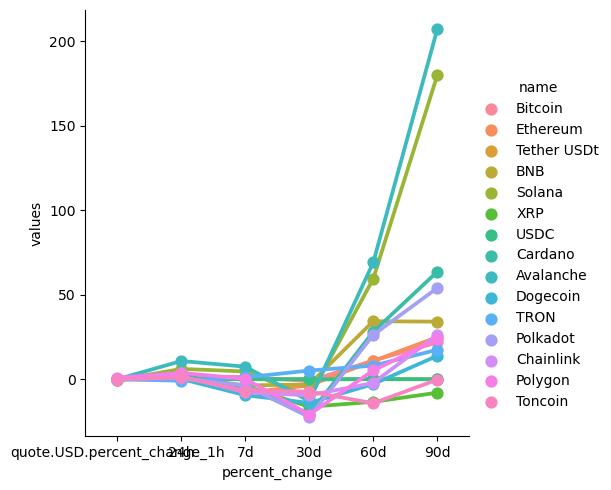

In [57]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [62]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df71[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42379.60250,2024-01-28 15:10:00.500756
15,Bitcoin,42370.64286,2024-01-28 15:11:04.852769
30,Bitcoin,42375.55000,2024-01-28 15:12:05.929161
45,Bitcoin,42386.04034,2024-01-28 15:13:08.190348


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

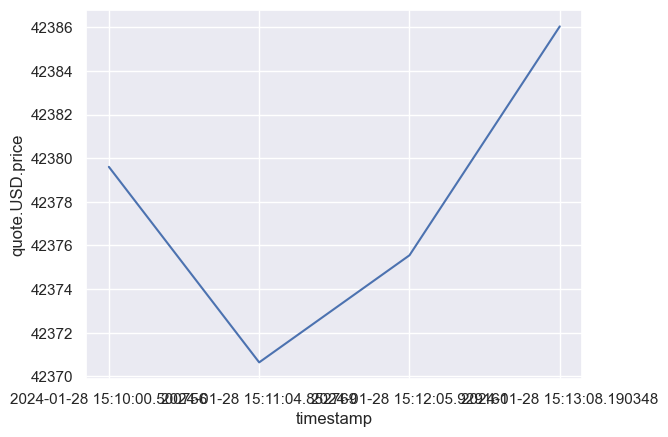

In [63]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)